## Imports ##

In [2480]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

## Functions ##

In [2481]:
def plot(image):
    plt.imshow(image,cmap='gray', vmin=0, vmax=255)
    plt.axis('off')  # Turn off axis

In [2482]:
def check_mirror(image):
    if image[0, 0] == 0:
        image = cv2.bitwise_not(image)
    return image

In [2483]:
# Find roation of the image and rotate it to be straight on a white background
def check_rotation(image):
    angle = find_angle(image)
    M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
    image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), borderValue=255)
    return image

In [2484]:
# find the angle of rotation of the qr code, it may be slightly tilted
def find_angle(image):
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    angle = 0
    if lines is not None:
        for line in lines:
            for rho, theta in line:
                if np.pi / 4 < theta < 3 * np.pi / 4:
                    angle = np.rad2deg(theta - np.pi / 2)
    return angle

In [2485]:
# Export processed image into a file in test_outputs folder
def export_image(image, path):
    cv2.imwrite(path, image)

## Images ##

In [2486]:
images = []

for image in os.listdir("./test-cases"):
    images.append(cv2.cvtColor(cv2.imread("./test-cases/" + image), cv2.COLOR_BGR2GRAY))
    
plt.style.use({'figure.facecolor': 'white'})

### Image 1 ###

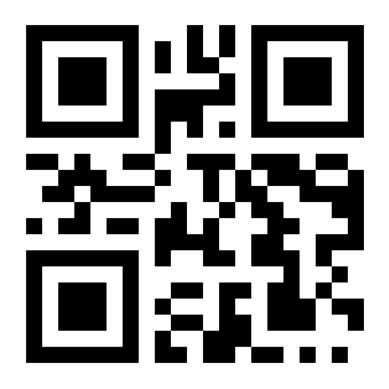

In [2487]:
image = images[0]
plot(image)

In [2488]:
export_image(image, "./test_outputs/image1.jpg")

Issue: None
Solution: Not needed
Status: Success
Text: 01-Good job!

### Image 2 ###

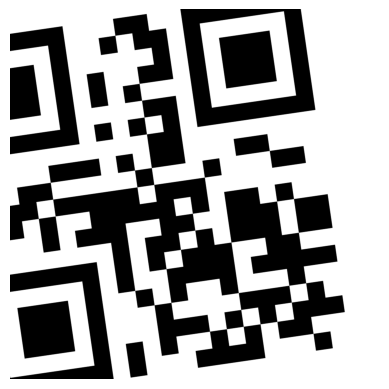

In [2489]:
image = images[1]
plot(image)

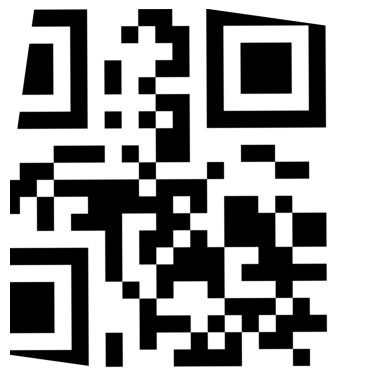

In [2490]:
image = check_rotation(image)
plot(image)

In [2491]:
export_image(image, "./test_outputs/image2.jpg")

Issue: Square rotated and trimmed
Solution: check rotation angle and rotate, the image should be shifted to have the squares in the corners 40 pixels away from the borders
Status: Fail
Text: 02-Matsawar-3edel

### Image 3 ###

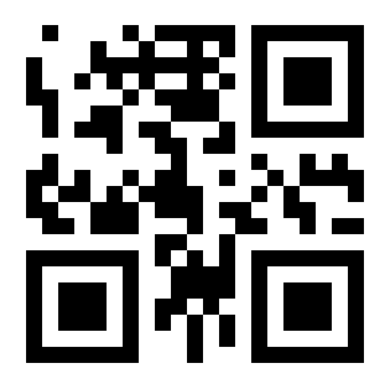

In [2492]:
image = images[2]
plot(image)

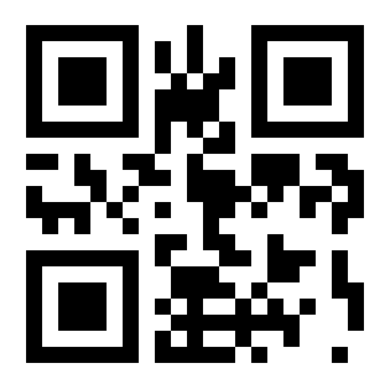

In [2493]:
image = check_rotation(image)
image = cv2.rotate(image, cv2.ROTATE_180)
plot(image)

Issue: Rotated 180 degrees (Out of preprocessing scope)
Solution: ?????????
Status: Success
Text: LeffyBinaYaDonya

In [2494]:
export_image(image, "./test_outputs/image3.jpg")

### Image 4 ###

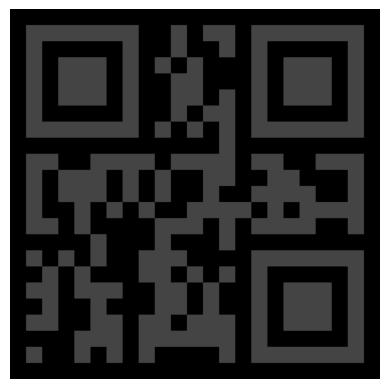

In [2495]:
image = images[3]
plot(image)

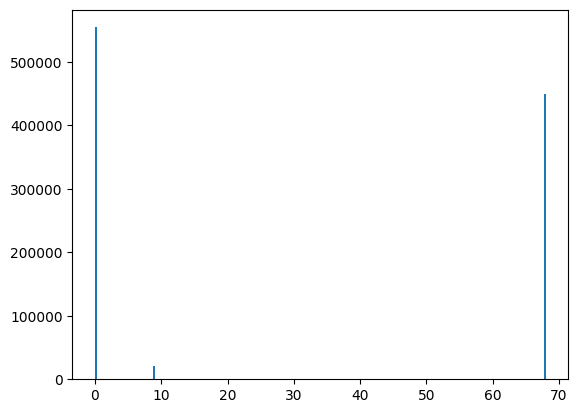

In [2496]:
plt.hist(image.ravel(), bins=256);

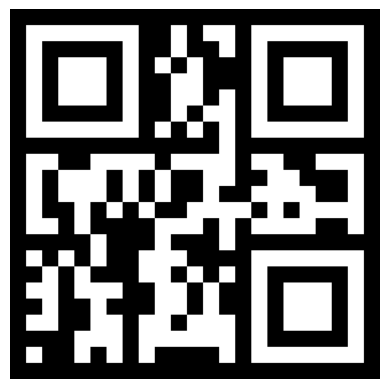

In [2497]:
_, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot(image)

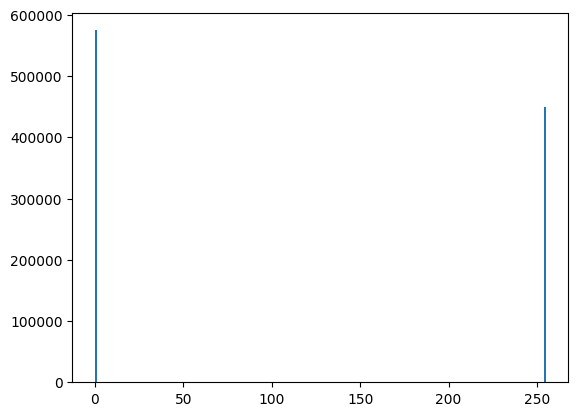

In [2498]:
plt.hist(image.ravel(), bins=256);

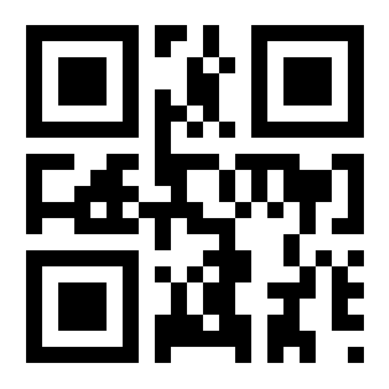

In [2499]:
# Check the top left pixel, if it is black then invert the image
image = check_mirror(image)
image = check_rotation(image)
image = cv2.flip(image, 1)
plot(image)

Issue: White and Black are swapped + Mirror + White intensity is low
Solution: Thresholding for white intensity, check the color of the quiet zone for swapping, mirror vertically for mirroring
Status: Success
Text: Black mirror hehe

In [2500]:
export_image(image, "./test_outputs/image4.jpg")

### Image 5 ###

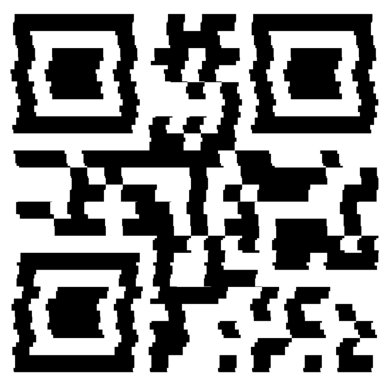

In [2501]:
image = images[4]
plot(image)

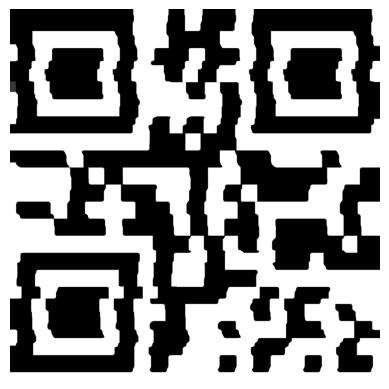

In [2502]:
# Apply median filter
image = cv2.medianBlur(image, 9)
# Apply opening
kernel = np.ones((31, 31), np.uint8)
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plot(image)

In [2503]:
export_image(image, "./test_outputs/image5.jpg")

Issue: Edges are distorted
Solution: ?????????
Status: Fail
Text: |rxwx1eh2

### Image 6 ###

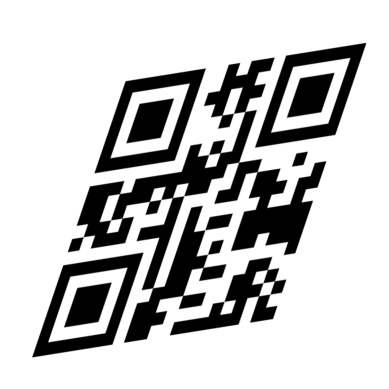

In [2504]:
image = images[5]
plot(image)

Issue: Needs reshaping
Solution: ?????????
Status: Fail
Text: dwXQ49gcwWQ

### Image 7 ###

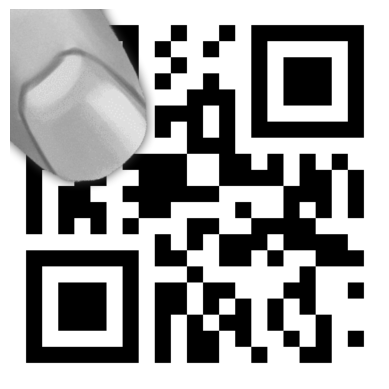

In [2505]:
image = images[6]
plot(image)

In [2506]:
# plt.hist(image.ravel(), bins=256);
# Whiten any bins in the histogram that has lower pixels than 20000
# _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# plot(image)

Issue: Noise in the image
Solution: ?????????
Status: Fail
Text: ?????????

### Image 8 ###

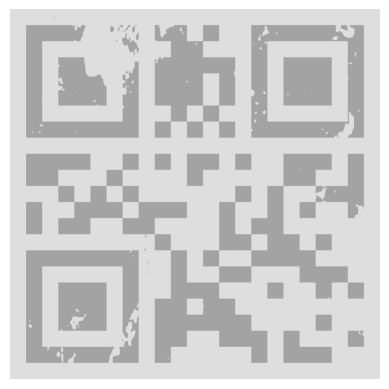

In [2507]:
image = images[7]
plot(image)

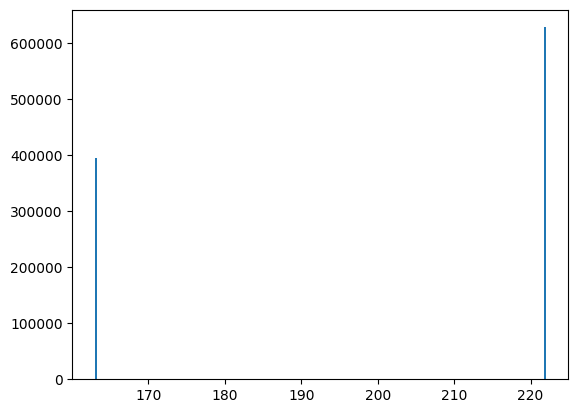

In [2508]:
plt.hist(image.ravel(), bins=256);

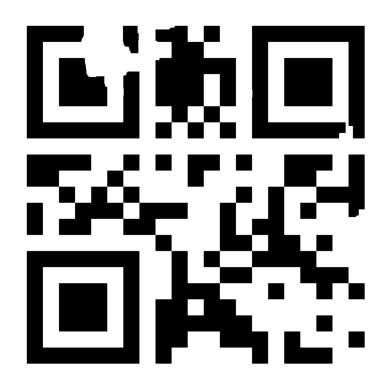

In [2509]:
image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, se_rect)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se_rect)
plot(image)

In [2510]:
export_image(image, "./test_outputs/image8.jpg")

Issue: Colors are not solid, black pixels missing
Solution: Thresholding to convert into solid black and white, opening then closing to restore black pixels
Status: Fail
Text: ?????????

# First Half done, The second half needs to be added in the same way